In [1]:
import nengo
import nengo_loihi
from nxsdk.graph.monitor.probes import PerformanceProbeCondition
from nxsdk.api.n2a import ProbeParameter
import numpy as np

run_time = 0.140
dt = 0.001

############  My code for LSNN ###################
from lsnn import get_nengo_lsnn_model, get_A_p_and_B_p_matrices, get_enc_transform_matrix

d = 10
A_p, B_p = get_A_p_and_B_p_matrices(d)
t_mat = get_enc_transform_matrix(d)
np.random.seed(45)
lyr_e2h = np.random.rand(2*d, 3*d)
np.random.seed(45)
lyr_h2o = np.random.rand(3*d, 2)
x = np.random.rand(int(run_time*1000)) - 1.0

net = get_nengo_lsnn_model(x, A_p, B_p, t_mat, lyr_e2h, lyr_h2o, d)
################################################

############  My code for SLRC ###################
# from slrc import get_nengo_slrc_model, get_A_p_and_B_p_matrices
# d = 10
# A_p, B_p = get_A_p_and_B_p_matrices(d)
# x = np.random.rand(int(run_time*1000)) - 1.0

# net = get_nengo_slrc_model(x, A_p, B_p, d, n_nrns=100)
################################################

sim = nengo_loihi.Simulator(net, dt=dt)
board = sim.sims["loihi"].nxsdk_board
probe_cond = PerformanceProbeCondition(
    tStart=1, tEnd=int(run_time / dt)*1, bufferSize=1024 * 2, binSize=4
)
e_probe = board.probe(ProbeParameter.ENERGY, probe_cond)

with sim:
    sim.run(run_time)
    
print("Done!!!")

Running the LSNN network...
INFO:DRV:  SLURM is being run in background


/homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/nengo_loihi/builder/ensemble.py:164: UserWarning: NengoLoihi does not support initial values for 'voltage' being non-zero on SpikingRectifiedLinear neurons. On the chip, all values will be initialized to zero.
  warnings.warn(


INFO:DRV:  Connecting to 10.212.98.104:41979
INFO:DRV:      Host server up..............Done 0.18s
INFO:DRV:      Encoding axons/synapses.....Done 2.62ms
INFO:DRV:      Compiling Embedded snips....Done 0.16s
INFO:DRV:      Compiling MPDS Registers....Done 0.41ms
INFO:HST:  Args chip=0 cpu=0 /homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/nxsdk/driver/compilers/../../../temp/1674104415.5922291/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --cpu-active-ratio=1 
INFO:HST:  Nx...
INFO:DRV:      Booting up..................Done 0.78s
INFO:DRV:      Encoding probes.............Done 0.42ms
INFO:DRV:      Transferring probes.........Done 5.39ms
INFO:DRV:      Configuring registers.......Done 3.12ms
INFO:DRV:      Transferring spikes.........Done 0.01s
INFO:DRV:      Executing...................Done 0.09s
INFO:DRV:      Processing timeseries.......Done 0.02s
INFO:DRV:  Executor: 140 timesteps.........Done 0.14s
INFO:HST:  chip=0 cpu=0 halted, status=0x0
Done!!!


/homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
e_probe.totalEnergy, e_probe.energyUnits

(73779.64799999999, 'uJ')

# #######################################################

In [3]:
e_probe.energyUnits

'uJ'

In [4]:
print(e_probe.totalEnergyPerTimeStep.shape) # 1D, total energy per timestep for all energy types and phases
print(e_probe.totalEnergyPerTimeStep)
print(np.sum(e_probe.totalEnergyPerTimeStep)) # Matches e_probe.totalEnergy

(140,)
[794.408 557.2   515.012 520.584 553.22  518.992 523.768 527.748 577.896
 524.564 514.216 522.176 515.012 520.584 522.176 521.38  576.304 540.484
 531.728 518.992 525.36  520.584 506.256 581.876 530.136 524.564 520.584
 519.788 539.688 519.788 524.564 513.42  620.084 539.688 519.788 523.768
 526.952 518.992 527.748 529.34  518.196 519.788 511.828 525.36  521.38
 520.584 506.256 526.156 511.032 514.216 514.216 518.196 521.38  550.036
 522.972 520.584 512.624 522.176 518.992 512.624 526.952 503.868 534.912
 538.892 646.352 532.524 531.728 515.012 673.416 528.544 526.156 525.36
 526.952 515.012 513.42  514.216 512.624 525.36  510.236 514.216 512.624
 512.624 516.604 521.38  526.952 526.156 515.012 526.952 520.584 526.952
 523.768 507.848 513.42  521.38  520.584 513.42  509.44  518.992 526.156
 526.952 515.808 526.952 507.052 528.544 525.36  522.972 520.584 518.196
 508.644 515.012 526.156 515.012 517.4   514.216 517.4   526.952 537.3
 518.992 514.216 522.176 520.584 522.176 516.604

In [5]:
e_probe.EnergyType(0), e_probe.EnergyType(1)

(<_EnergyTypeEnum.VDD: 0>, <_EnergyTypeEnum.VDDM: 1>)

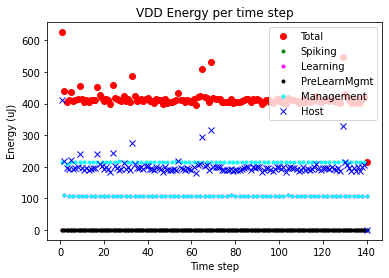

In [6]:
e_probe.plotEnergyType(0) # VDD Plot with energy = NeuroCores + Embedded Lakemont CPU + everything else

In [7]:
e_probe.NUM_ENERGY_VALUES, e_probe.EnergyPhase, e_probe.EnergyType

(140, <enum '_EnergyPhaseEnum'>, <enum '_EnergyTypeEnum'>)

In [8]:
e_probe.totalEnergy

73779.64799999999